In [1]:
"""
Ejercicio practico 1: 
    Integrantes
    Jimmy Rivera
    Grace Proaño
    Danilo Cruz
    Lesly Hidalgo
    Marlon Cumbal
"""

'\nEjercicio practico 1: \n    Integrantes\n    Jimmy Rivera\n    Grace Proaño\n    Danilo Cruz\n    Lesly Hidalgo\n    Marlon Cumbal\n'

In [2]:

import pandas as pd

# Cargar los datos
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')  


In [3]:
# Separar las etiquetas de las imágenes
X_train = train_data.drop('label', axis=1) / 255.0  # Normalizar los valores de los píxeles
y_train = train_data['label']

X_test = test_data.drop('label', axis=1) / 255.0  # Normalizar los valores de los píxeles
y_test = test_data['label']

# Crear nuevas características (ejemplo: simetría)
# Esta es una simplificación, la implementación real dependerá de tu análisis
X_train['symmetry'] = X_train.values.reshape(-1, 28, 28).sum(axis=1).sum(axis=1)  
X_test['symmetry'] = X_test.values.reshape(-1, 28, 28).sum(axis=1).sum(axis=1)    


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Construir el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

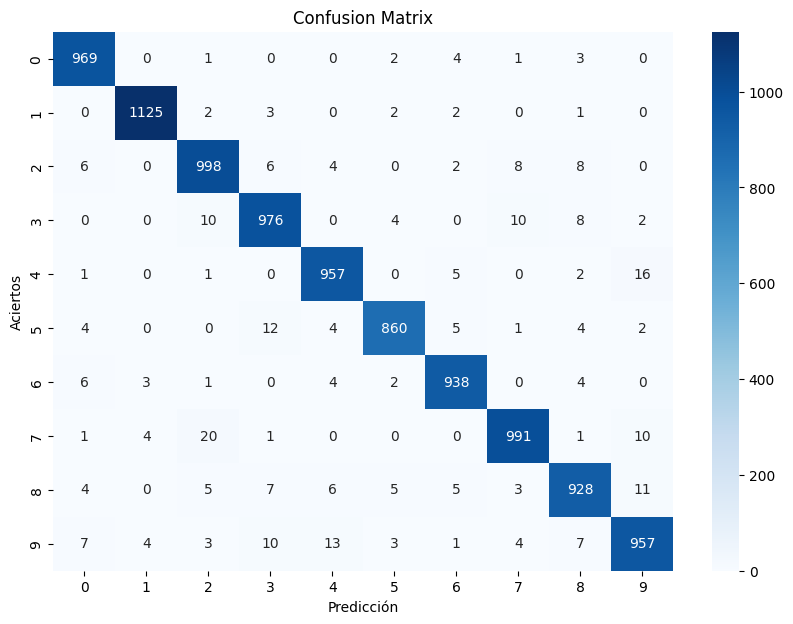

Precisión del modelo: 96.99%


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Aciertos')
plt.title('Confusion Matrix')
plt.show()

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {accuracy * 100:.2f}%')






In [6]:
from sklearn.metrics import classification_report

# Obtener el informe de clasificación   
reporte = classification_report(y_test, y_pred, digits=3)

print(reporte)

              precision    recall  f1-score   support

           0      0.971     0.989     0.980       980
           1      0.990     0.991     0.991      1135
           2      0.959     0.967     0.963      1032
           3      0.962     0.966     0.964      1010
           4      0.969     0.975     0.972       982
           5      0.979     0.964     0.972       892
           6      0.975     0.979     0.977       958
           7      0.973     0.964     0.969      1028
           8      0.961     0.953     0.957       974
           9      0.959     0.948     0.954      1009

    accuracy                          0.970     10000
   macro avg      0.970     0.970     0.970     10000
weighted avg      0.970     0.970     0.970     10000

